# **Data Understanding and Exploratory Data Analysis (EDA)**

## Objectives

* Explore the electricity cost dataset to understand key patterns
* Identify factors associated with electricity cost
* Validate project hypotheses related to electricity cost drivers

## Inputs

* outputs/datasets/collection/ElectricityCost.csv

## Outputs

* Visualisations and insights to inform the dashboard and modelling


---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/PP5-TBC-/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chdir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/PP5-TBC-'

---

# Load data

In [4]:
import pandas as pd

df = pd.read_csv("outputs/datasets/collection/ElectricityCost.csv")
df.head()

,site area,structure type,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost
0,1360,Mixed-use,2519.0,69,52,188,1,72,1420.0
1,4272,Mixed-use,2324.0,50,76,165,65,261,3298.0
2,3592,Mixed-use,2701.0,20,94,198,39,117,3115.0
3,966,Residential,1000.0,13,60,74,3,35,1575.0
4,4926,Residential,5990.0,23,65,32,57,185,4301.0


In [5]:
df.shape

(10000, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   site area             10000 non-null  int64  
 1   structure type        10000 non-null  object 
 2   water consumption     10000 non-null  float64
 3   recycling rate        10000 non-null  int64  
 4   utilisation rate      10000 non-null  int64  
 5   air qality index      10000 non-null  int64  
 6   issue reolution time  10000 non-null  int64  
 7   resident count        10000 non-null  int64  
 8   electricity cost      10000 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 703.3+ KB


### Dataset Overview

The dataset contains 10,000 observations and 9 columns, with a mix of numerical and one categorical feature. All columns contain complete data with no missing values. 

This confirms the dataset is suitable for exploratory data analysis. No data cleaning or transformation decisions are made at this stage.

Minor inconsistencies in column naming are observed and will be addressed during the data cleaning and preprocessing stage.

---

# Automated Data Profiling

An automated profiling report is generated to support the exploratory data analysis.
This report provides a high-level overview of variable distributions, missing values, correlations, and potential data quality issues.

In [7]:
import numpy as np

from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 9/9 [00:00<00:00, 95.00it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Key Observations from Profiling 

An initial profiling of the dataset using ydata-profiling was performed, covering 10,000 site observations across 9 variables. Here are the key insights and considerations for data cleaning and feature engineering.

1. **Site Area (numeric)**
   * Distribution is fairly balanced across the range 501–5000 m², with no missing or zero values.
   * The median (2,774) is close to the mean (2,758), and skewness is near zero, indicating a symmetric distribution.
   * Implication: Ready for modeling, no transformation required.

2. **Structure Type (categorical)**
   * Four categories exist: residential (39%), commercial (30%), mixed-use (20%), industrial (10%).
   * Residential and commercial sites dominate; industrial sites are the least common.
   * Implication: One-hot or target encoding recommended; watch out for rare categories like industrial.

3. **Water Consumption (numeric)**
   * Values range from 1,000–10,894 liters/day, with a notable skew toward 1,000 liters.
   * The histogram shows a right-skewed distribution: many low-consumption sites and fewer high-consumption sites.
   * Implication: Consider log transformation or scaling to reduce skewness for modeling.

4. **Recycling Rate (numeric)**
   * Mostly well-distributed across 10–90%, with minor fluctuations between adjacent values.
   * Histogram shows low skewness; variation is moderate (CV ≈ 0.47).
   * Implication: Minimal preprocessing required; can leave as-is or consider grouping if desired.

5. **Utilisation Rate (numeric)**
   * Range: 30–100%, with low skewness and similar minor fluctuations as recycling rate
   * Implication: Well-behaved; ready for modeling.

6. **Air Quality Index (numeric)**
   * Values between 0–200, nearly symmetric, with only 0.5% zeros.
   * Implication: No major cleaning needed; values are evenly distributed for modeling.

7. **Issue Resolution Time (numeric)**
   * Range 1–72 days, nearly symmetric, minor repeated fluctuations.
   * Implication: Ready for modeling; no transformation required.

8. **Resident Count (numeric)**
   * High number of zeros (40%), reflecting non-residential sites.
   * Distribution is skewed (skewness ≈ 1.31) with a median of 39 and maximum of 489.
   * Implication: Consider grouping the data into ranges (e.g., 0, 1–50, 51–150, 151+) to reduce sparsity and improve model interpretability.

9. **Electricity Cost (target variable, numeric)**
    * Values range 500–6,446, slightly right-skewed (skewness ≈ 0.3).
    * No missing values or extreme outliers.
    * Implication: Ready for modeling.

**Key Alerts**
* **Resident Count:** 40% of sites have zero residents - this is expected for industrial/commercial sites but must be handled carefully.

**Takeaways**
1. **Resident Count Zeros:** Group into ranges to reduce sparsity and improve modeling performance.
2. **Water Consumption Skew:** Apply log transformation or scaling for modeling.
3. **Structure Type Encoding:** One-hot or target encoding, keeping an eye on rare categories.
4. **Well-Behaved Numeric Variables:** Recycling rate, utilisation rate, air quality index, and issue resolution time require minimal preprocessing.
5. **Target Variable:** Electricity cost is clean and ready; consider scaling depending on the algorithm.


---

# Import libraries for preprocessing and visualization

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
%matplotlib inline

---

# Check for duplicates

In [9]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


No duplicate rows were found in the dataset.

---

# Check for missing values

In [10]:
missing_values = df.isna().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 site area               0
structure type          0
water consumption       0
recycling rate          0
utilisation rate        0
air qality index        0
issue reolution time    0
resident count          0
electricity cost        0
dtype: int64


There are no missing values in the dataset.

---

# Inspect zero counts in `resident count`

Zero residents: 4009 (40.1%)


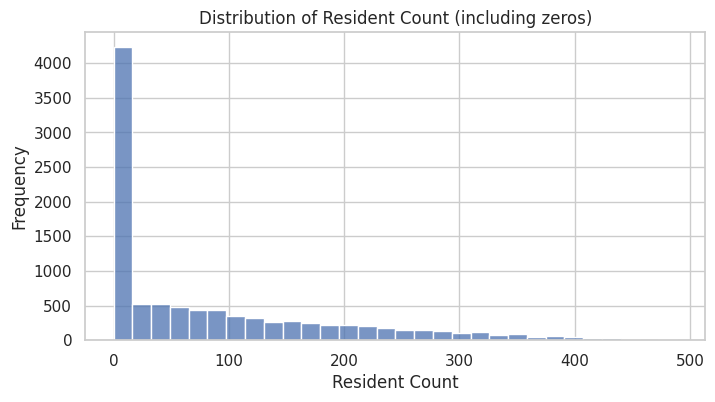

In [11]:
zero_residents = (df['resident count'] == 0).sum()
print(f"Zero residents: {zero_residents} ({zero_residents/len(df)*100:.01f}%)")

plt.figure(figsize=(8,4))
sns.histplot(df['resident count'], bins=30, kde=False)
plt.title("Distribution of Resident Count (including zeros)")
plt.xlabel("Resident Count")
plt.ylabel("Frequency")
plt.show()

About 40% of sites have zero residents. This is expected for industrial or commercial sites, which naturally do not house residents. Later, we may consider grouping resident counts into ranges or treating zero values separately for analysis and modeling.

---

# Overview of numeric variable distributions

In [12]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
site area,10000.0,2757.7751,1293.059959,501.0,1624.00,2773.5,3874.0,5000.0
water consumption,10000.0,3494.0571,2076.181117,1000.0,1779.00,3047.5,4811.0,10894.0
recycling rate,10000.0,49.5980,23.430141,10.0,29.75,49.0,70.0,90.0
utilisation rate,10000.0,64.8422,20.432965,30.0,47.00,65.0,83.0,100.0
air qality index,10000.0,99.4686,58.014526,0.0,49.00,100.0,150.0,200.0
issue reolution time,10000.0,36.4026,20.623905,1.0,19.00,36.0,54.0,72.0
resident count,10000.0,85.5731,107.876179,0.0,0.00,39.0,142.0,489.0
electricity cost,10000.0,2837.8450,1106.997441,500.0,1954.00,2760.0,3632.0,6446.0


The summary statistics (mean, median, min, max, quartiles) show that variables like water consumption and electricity cost have wider ranges, while others like recycling rate and utilisation rate are more concentrated around their medians.
Most numeric variables have a reasonable range and distribution.

---

# Visualize numeric distributions

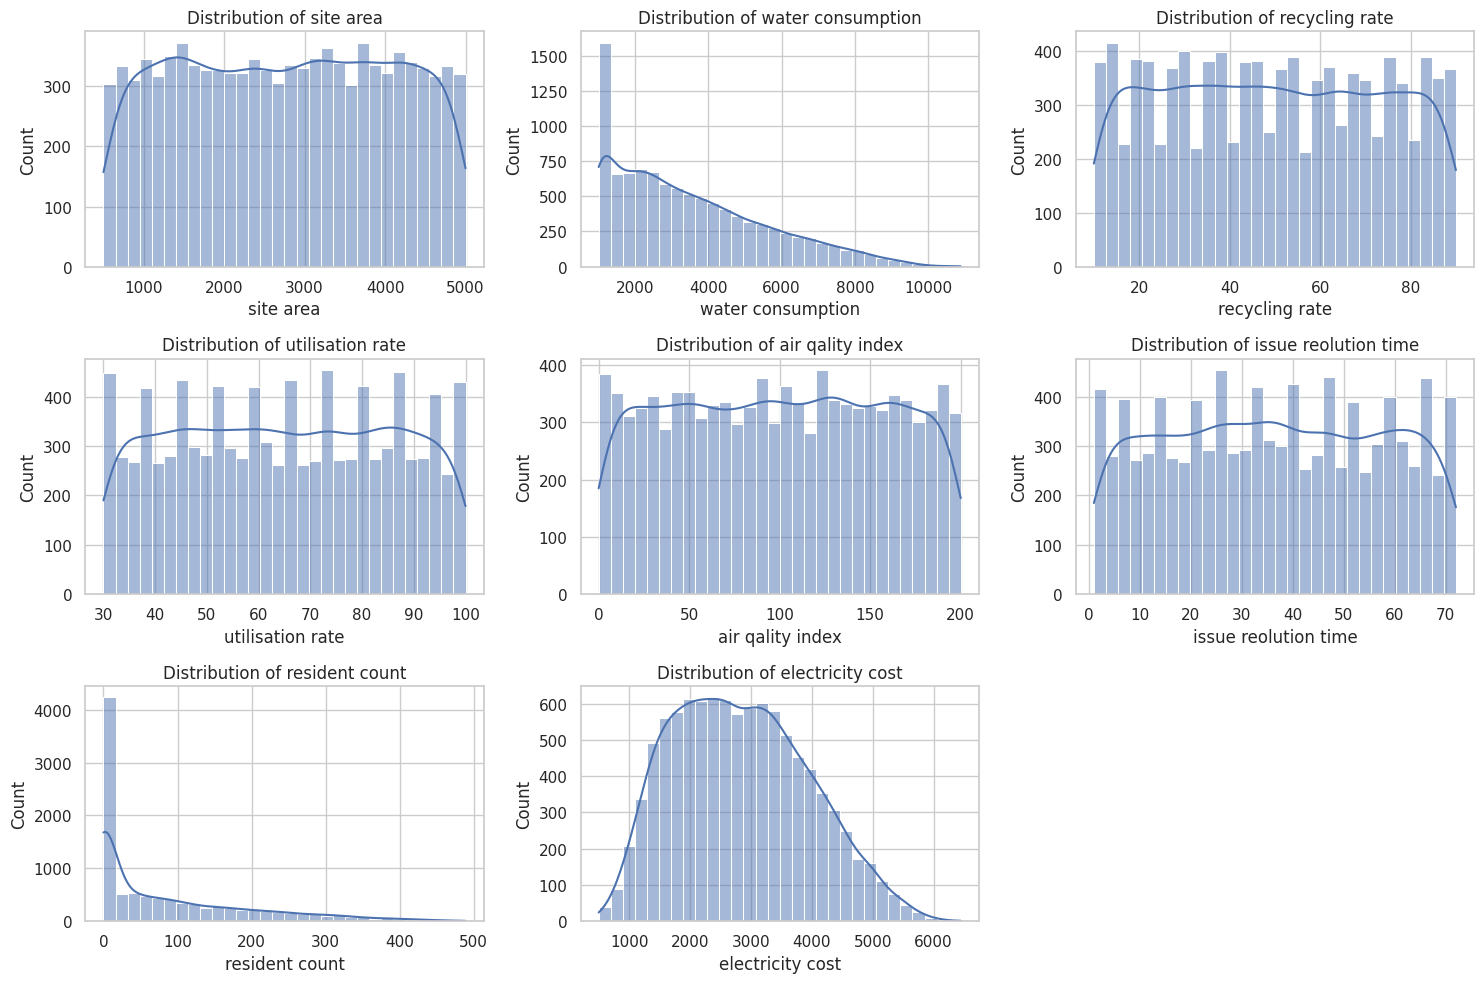

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

for j in range(len(numeric_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

The histograms above show the distribution of all numeric variables in the dataset. Overall, the visual patterns confirm the findings from the automated profiling step.

Most variables display relatively symmetric distributions with limited skewness, while water consumption and resident count show a noticeable right skew. No unexpected spikes or extreme outliers are observed.

These distributions suggest that most numeric variables are suitable for modeling with minimal preprocessing, with the exception of water consumption and resident count, which may benefit from transformation or grouping in later stages.

---

# Correlation heatmap

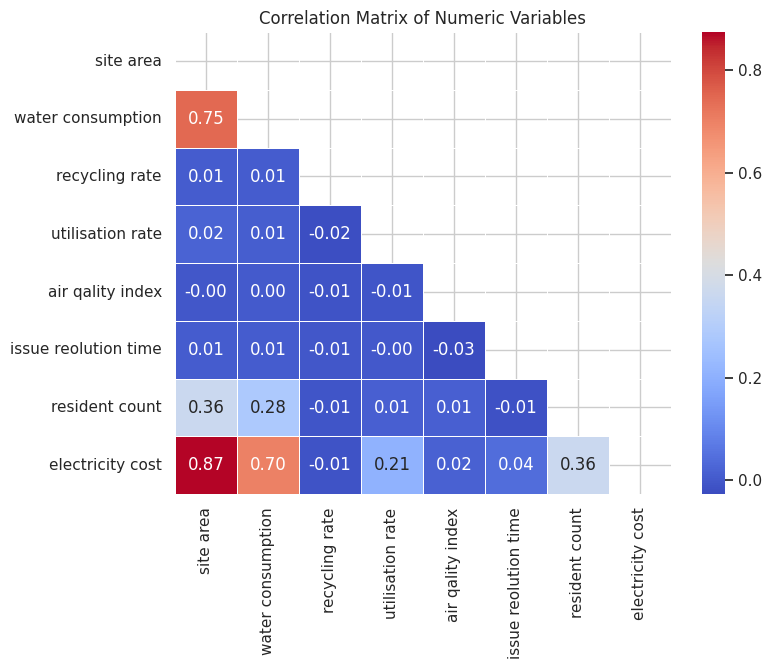

In [20]:
corr = df[numeric_cols].corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(8,6))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", linewidth=0.5)
plt.title("Correlation Matrix of Numeric Variables")
plt.show()

The heatmap shows a very strong positive correlation between site area and electricity cost. Water consumption has a strong positive correlation with electricity cost. Resident Count and Utilisation rate are weakly positively correlated to electricity cost.

---

# Skewness check

In [15]:
skew_values = df[numeric_cols].skew()
print("Skewness of numeric variables:\n", skew_values)

Skewness of numeric variables:
 site area              -0.005722
water consumption       0.774431
recycling rate          0.022425
utilisation rate        0.004645
air qality index       -0.004155
issue reolution time    0.006188
resident count          1.313040
electricity cost        0.301033
dtype: float64


Resident count and water consumption show a heavy positive skewness. All other variables show little skewness.

---

# Visualize categorical variable (`structure type`)

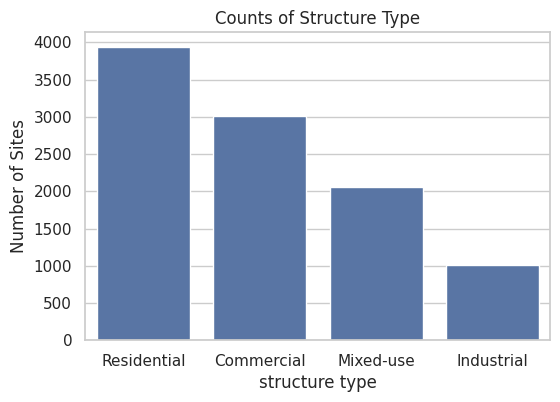

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x='structure type', data=df, order=df['structure type'].value_counts().index)
plt.title("Counts of Structure Type")
plt.ylabel("Number of Sites")
plt.show()

Four types of structures are present: residential, commercial, mixed-use, and industrial. Residential sites are most common, while industrial sites are least common.

---

# Explore numeric by categorical

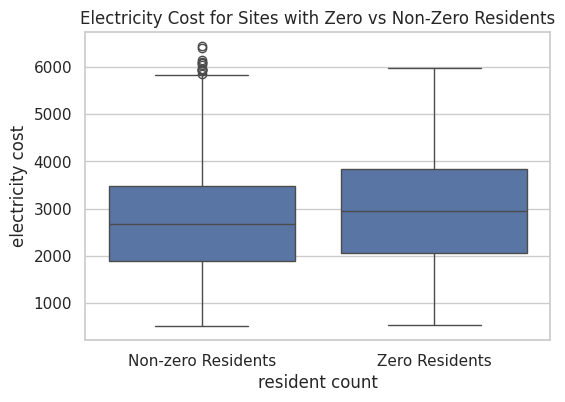

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(x=(df['resident count']==0), y='electricity cost', data=df)
plt.xticks([0,1], ['Non-zero Residents', 'Zero Residents'])
plt.title("Electricity Cost for Sites with Zero vs Non-Zero Residents")
plt.show()

For sites with residents there are outliers for electricity cost. For non-resident sites no outliers exist. The range and amount of electricity cost shows slightly larger and higher for sites with zero residents.

---

# Hypotheses Validation

The exploratory analysis provides initial evidence in support of the project's underlying assumptions regarding electricity cost drivers.

Electricity cost shows a strong positive relationship with site area and water consumption, thereby supporting the hypothesis that larger sites and more resource-intensive operations incur higher electricity costs. This aligns with business expectations, as larger physical spaces and higher operational activity typically require more energy.

It is evident that utilisation rate and resident count demonstrate weaker positive correlation with electricity cost. While these variables alone do not appear to be dominant drivers, they may still contribute explanatory value when combined with other features, particularly within specific structure types (e.g. residential versus industrial sites).

The structure type itself provides important contextual information. The high proportion of sites with zero residents is consistent with commercial and industrial locations, and helps explain differences in electricity cost patterns across site categories.

The EDA supports the hypothesis that electricity cost is influenced by a combination of physical site characteristics, operational intensity, and site usage type rather than a single dominant factor.

---

# Conclusions

This exploratory data analysis examined 10,000 sites to better understand the factors associated with electricity cost. The dataset is complete, well-structured, and suitable for further analysis and modelling, with no missing values or duplicate records.

The analysis indicates that site area and water consumption are the strongest individual predictors of electricity cost, suggesting that physical scale and operational demand play a central role in energy expenditure. While the relationships demonstrated by other variables, such as utilisation rate and resident count, are less pronounced, they may offer supplementary explanatory value when evaluated in conjunction.

A key structural insight is the presence of a large proportion of sites with zero residents, reflecting commercial and industrial usage. This is an expected outcome, and it emphasises the importance of accounting for structure type when interpreting electricity cost patterns.

The findings indicate that electricity costs are influenced by a number of interacting factors. This underscores the importance of a multivariate modelling approach, which is more reliable than single-variable explanations.

# Next steps

Based on the finding from the exploratory analysis, the following steps will be taken: 

* Perform data cleaning and preprocessing, including:
  * Standardising column names
  * Encoding the categorical variable `structure type`
  * Grouping of transforming the highly skewed `resident count` variable
  * Applying scaling or transformation to skewed numeric variables such as `water consumption`

* Conduct feature engineering informed by EDA insights, particularly around site characteristics and operational intensity.

* Develop predictive models to estimate electricity cost, using the identified drivers as input features.

* Evaluate model performance and interpretability to ensure results can support business decision-making and dashboard development.

These steps will build directly on the patterns and relationships identified in this notebook.